In [10]:
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers
from mlxtend.plotting import plot_decision_regions

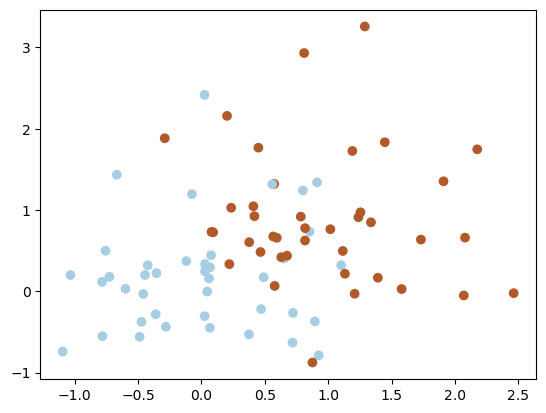

In [11]:
centers = ([0, 0], [1, 1])
X_train, y_train = datasets.make_blobs(n_samples=80, centers = centers, cluster_std=0.7)
X_test, y_test = datasets.make_blobs(n_samples=80, centers = centers, cluster_std=0.7)
# Plotting
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)

In [12]:
my_first_neural_net = tf.keras.Sequential([
    layers.Input(shape=(2, ), name="input"),
    layers.Dense(units=10, activation="relu",  kernel_regularizer=regularizers.l2(1e-4),),
    layers.Dropout(0.3),
    layers.Dense(units=10, activation="relu",  kernel_regularizer=regularizers.l2(1e-4),),
    layers.Dropout(0.5),
    layers.Dense(units=1, activation="sigmoid", name="output")
])

In [13]:
my_first_neural_net.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
my_first_neural_net.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
                                  loss= tf.keras.losses.binary_crossentropy,
                                  metrics=['accuracy'])

In [15]:
history = my_first_neural_net.fit(X_train, y_train, epochs=5000, verbose=2)

Epoch 1/5000
3/3 - 0s - 141ms/step - accuracy: 0.5125 - loss: 0.8219
Epoch 2/5000
3/3 - 0s - 11ms/step - accuracy: 0.5375 - loss: 0.7106
Epoch 3/5000
3/3 - 0s - 5ms/step - accuracy: 0.5500 - loss: 0.6860
Epoch 4/5000
3/3 - 0s - 9ms/step - accuracy: 0.5875 - loss: 0.7223
Epoch 5/5000
3/3 - 0s - 9ms/step - accuracy: 0.6500 - loss: 0.7098
Epoch 6/5000
3/3 - 0s - 6ms/step - accuracy: 0.6625 - loss: 0.6243
Epoch 7/5000
3/3 - 0s - 5ms/step - accuracy: 0.8125 - loss: 0.5823
Epoch 8/5000
3/3 - 0s - 9ms/step - accuracy: 0.7000 - loss: 0.5881
Epoch 9/5000
3/3 - 0s - 10ms/step - accuracy: 0.7125 - loss: 0.6187
Epoch 10/5000
3/3 - 0s - 5ms/step - accuracy: 0.7750 - loss: 0.6386
Epoch 11/5000
3/3 - 0s - 5ms/step - accuracy: 0.7625 - loss: 0.5625
Epoch 12/5000
3/3 - 0s - 12ms/step - accuracy: 0.7500 - loss: 0.5785
Epoch 13/5000
3/3 - 0s - 7ms/step - accuracy: 0.7125 - loss: 0.6054
Epoch 14/5000
3/3 - 0s - 8ms/step - accuracy: 0.8125 - loss: 0.5824
Epoch 15/5000
3/3 - 0s - 11ms/step - accuracy: 0.675

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 929us/step


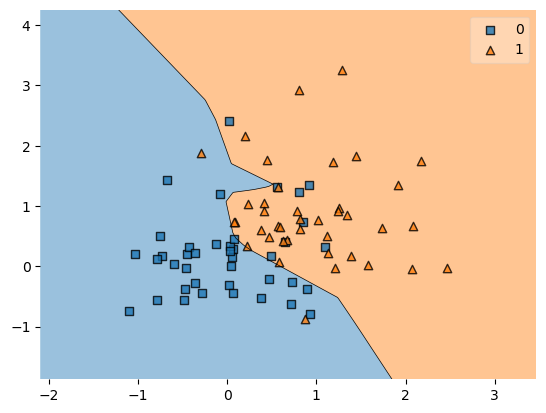

In [16]:
plot_decision_regions(X_train, y_train, clf=my_first_neural_net)
plt.show()

In [17]:
my_first_neural_net.evaluate(X_train, y_train)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8750 - loss: 0.2754  


[0.2888561487197876, 0.875]

In [18]:
my_first_neural_net.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7953 - loss: 0.4034 


[0.40011778473854065, 0.824999988079071]